# ML Data Cleaning and Feature Selection 

About the Dataset - 

https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset/


Heart Attack Analysis & Prediction Dataset is used here to determine if a given person has a chance of getting a heartattack based on the features in the dataset. 

The features in the Dataset are - 

1. Age : Age of the patient. DataType - Numerical 
2. Sex: Sex of the patient. DataType - Categorical 
3. exang: Exercise induced angina (1 = yes; 0 = no). DataType - Categorical 
4. caa: Number of major vessels (0-3). DataType - Categorical 
5. cp : Chest Pain type chest pain type. DataType - Categorical 

* Value 1: typical angina
* Value 2: atypical angina
* Value 3: non-anginal pain
* Value 4: asymptomatic

6. trtbps : resting blood pressure (in mm Hg). DataType - Numerical 

7. chol : cholestoral in mg/dl fetched via BMI sensor. DataType - Numerical 

8. fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false). DataType - Categorical 

9. rest_ecg : resting electrocardiographic results. DataType - Categorical 

* Value 0: normal
* Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
* Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

10. thalach : maximum heart rate achieved. DataType - Numerical 

11. Olpeak: This represents the amount by which a specific portion of an electrocardiogram (ECG or EKG) drops or goes lower than its baseline level during and after physical exercise. DataType - Numerical

12. output : This is the <strong>dependant variable</strong>. 0= less chance of heart attack 1= more chance of heart attack. DataType - Categorical 

Analyzing the "Heart Attack Analysis & Prediction Dataset" is important due to its direct relevance to public health and medical research. This dataset offers insights into critical areas and helps identify risk factors such as age, gender, cholesterol levels, and lifestyle habits that contribute to heart attacks, using which we can have better prevention strategies and personalized medical treatment. Ultimately, this analysis has the potential to save lives or increase the lifespan of individuals.

### Aim:

The project aims at answering the following question with the current dataset.

* What are the data types? (Only numeric and categorical)

* Are there missing values?

* What are the likely distributions of the numeric variables?

* Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

* Which independent variables have missing data? How much?

* Do the training and test sets have the same data?

* In the predictor variables independent of all the other predictor variables?

* Which predictor variables are the most important?

* Do the ranges of the predictor variables make sense?

* What are the distributions of the predictor variables?

* Remove outliers and keep outliers (does if have an effect of the final predictive model)?

* Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values? That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

In [95]:
import numpy as np
import os
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import opendatasets as od

In [96]:
# Read the heart attack prediction dataset and check the data

data1 = "https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset"
od.download(data1)




Skipping, found downloaded files in "./heart-attack-analysis-prediction-dataset" (use force=True to force download)


In [97]:
data_dir = './heart-attack-analysis-prediction-dataset'
os.listdir(data_dir)


['heart.csv', 'o2Saturation.csv']

In [101]:
df = pd.read_csv('./heart-attack-analysis-prediction-dataset/heart.csv')

In [102]:
df.head()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [103]:
# Checking for null values or missing data
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

No data is missing so we don't need to remove the null values or aggregate them

## Checking the Distributions of the Numerical Variables 

<Figure size 800x500 with 0 Axes>

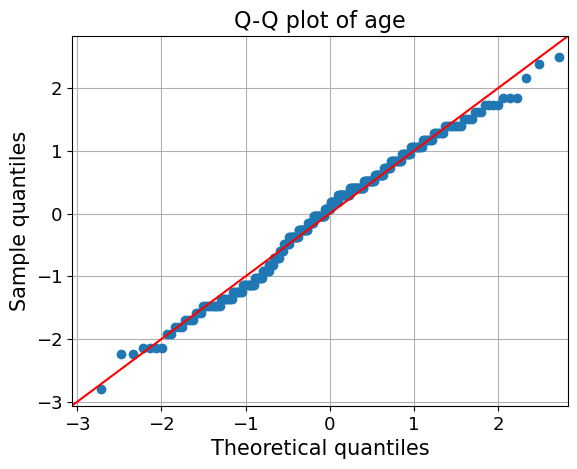

<Figure size 800x500 with 0 Axes>

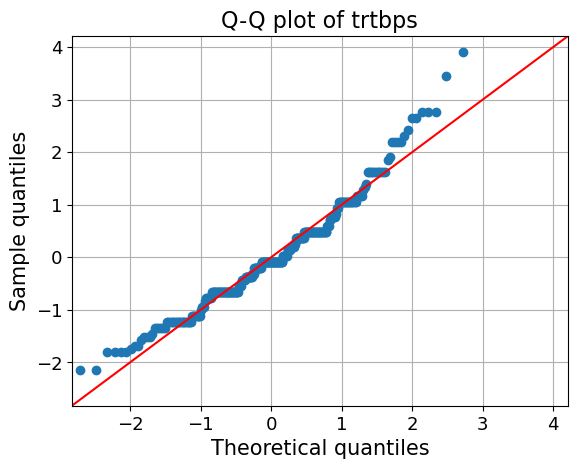

<Figure size 800x500 with 0 Axes>

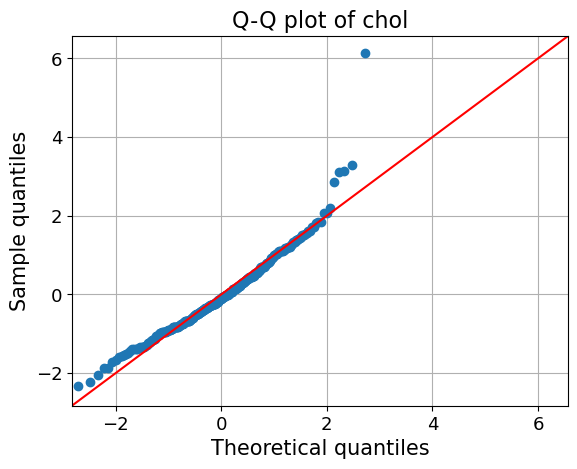

<Figure size 800x500 with 0 Axes>

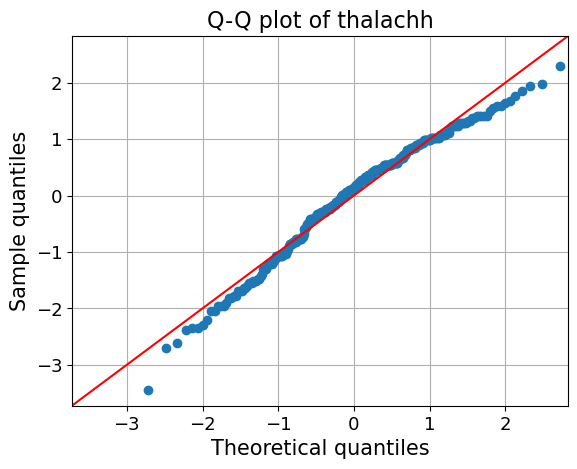

<Figure size 800x500 with 0 Axes>

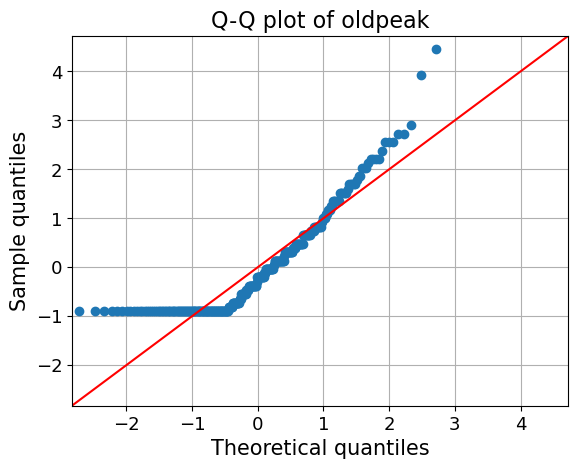

In [6]:
from statsmodels.graphics.gofplots import qqplot
normalization_data = df[['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']]

for variable in normalization_data.columns[:]:
    plt.figure(figsize=(8, 5))
    fig = qqplot(normalization_data[variable], line="45", fit="True")
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.xlabel("Theoretical quantiles", fontsize=15)
    plt.ylabel("Sample quantiles", fontsize=15)
    plt.title("Q-Q plot of {}".format(variable), fontsize=16)
    plt.grid(True)
    plt.show()
    

1. It is evident from the plots that most of the independant variables are following normal distribution. 
2. There are some outliers that can be seen in oldpeak and trtbps plots.

<Axes: >

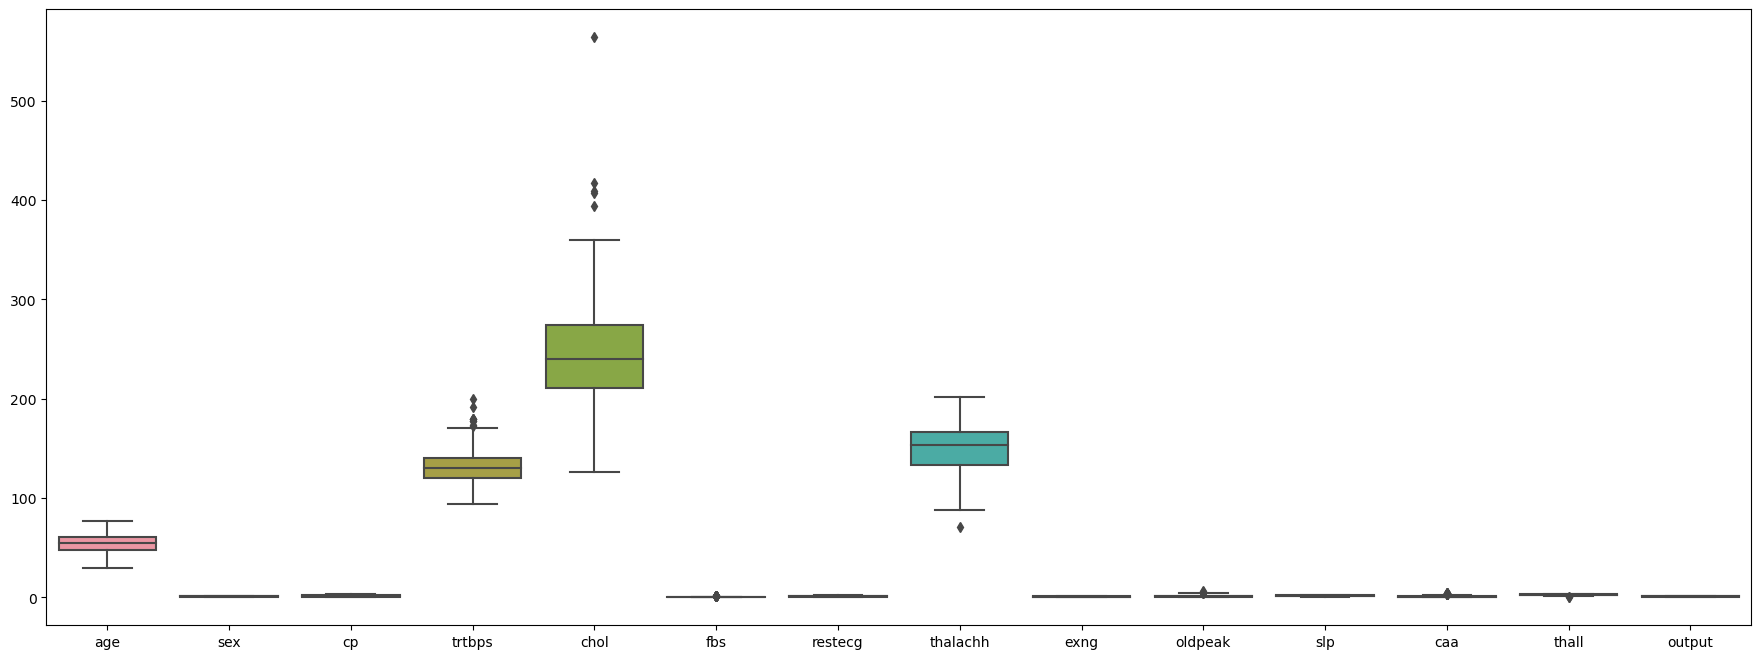

In [7]:
# Using a box plot to check the ranges of the predictor and dependant variables.

plt.figure(figsize=(22,8))
sns.boxplot(data=df)

The data here is not in the same distribution ranges. This makes it difficult to read the plot. We will normalize the data to for better understanding and visualisation. 

### Data transformation And Feature Creation

In [8]:
from sklearn import preprocessing

# Creating binary variables for categorical data

dummy_data = pd.get_dummies(df)

# Normalizing data in age, trtbps, chol, thalachh because it is too high compared to the other variables

normalized_age = dummy_data[["age"]].values.astype(float)
normalized_trtbps = dummy_data[["trtbps"]].values.astype(float)
normalized_chol = dummy_data[["chol"]].values.astype(float)
normalized_thalachh = dummy_data[["thalachh"]].values.astype(float)
normalized_oldpeak = dummy_data[["oldpeak"]].values.astype(float) 


# Preparing for normalizing
min_max_scaler = preprocessing.MinMaxScaler()


# Transform the data using min max scalar
age_scaled = min_max_scaler.fit_transform(normalized_age)
trtbps_scaled = min_max_scaler.fit_transform(normalized_trtbps)
chol_scaled = min_max_scaler.fit_transform(normalized_chol)
thalachh_scaled = min_max_scaler.fit_transform(normalized_thalachh)
oldpeak_scaled = min_max_scaler.fit_transform(normalized_oldpeak)


# Swap the data in the df with the normalized data
dummy_data[["age"]] = pd.DataFrame(age_scaled)
dummy_data[["trtbps"]] = pd.DataFrame(trtbps_scaled)
dummy_data[["chol"]] = pd.DataFrame(chol_scaled)
dummy_data[["thalachh"]] = pd.DataFrame(thalachh_scaled)
dummy_data[["oldpeak"]] = pd.DataFrame(oldpeak_scaled)

In [9]:
# Data after normalizing it

dummy_data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0.708333,1,3,0.481132,0.244292,1,0,0.603053,0,0.370968,0,0,1,1
1,0.166667,1,2,0.339623,0.283105,0,1,0.885496,0,0.564516,0,0,2,1
2,0.250000,0,1,0.339623,0.178082,0,0,0.770992,0,0.225806,2,0,2,1
3,0.562500,1,1,0.245283,0.251142,0,1,0.816794,0,0.129032,2,0,2,1
4,0.583333,0,0,0.245283,0.520548,0,1,0.702290,1,0.096774,2,0,2,1


<Axes: >

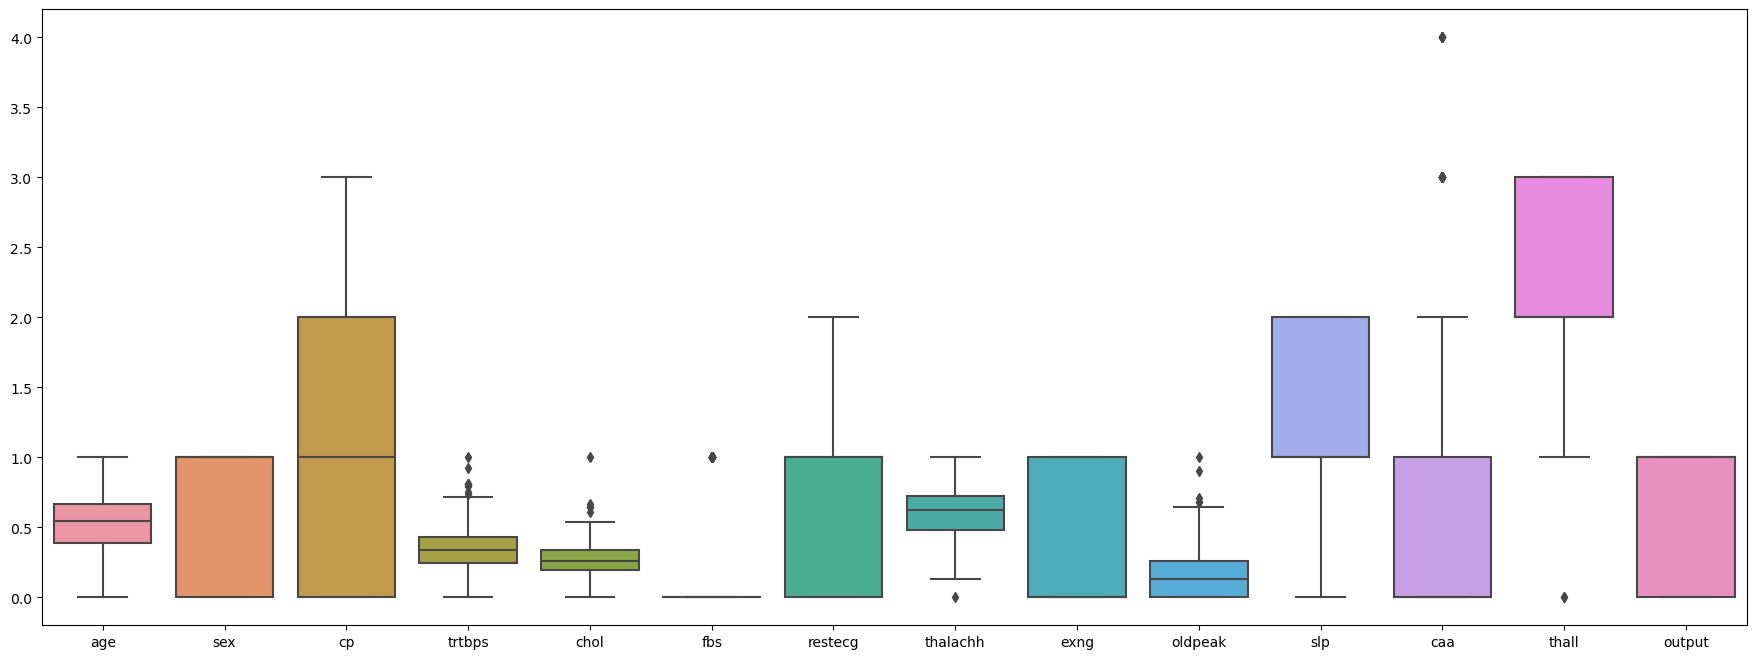

In [10]:
# Creating the plot again to check the normalized data
plt.figure(figsize=(22,8))
sns.boxplot(data=dummy_data)

We can infur the following from the graph - 

1. chol, fbs, restecg, oldpeak,caa have some outliers meaning some people did not get a heart attack despite having more more cholesterol, Rest ECG, Fbs but it is not a common occurence. 
2. Sex Distributon in the graph

In [11]:
# Correlation between variables in the graph 
dummy_data.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<Axes: >

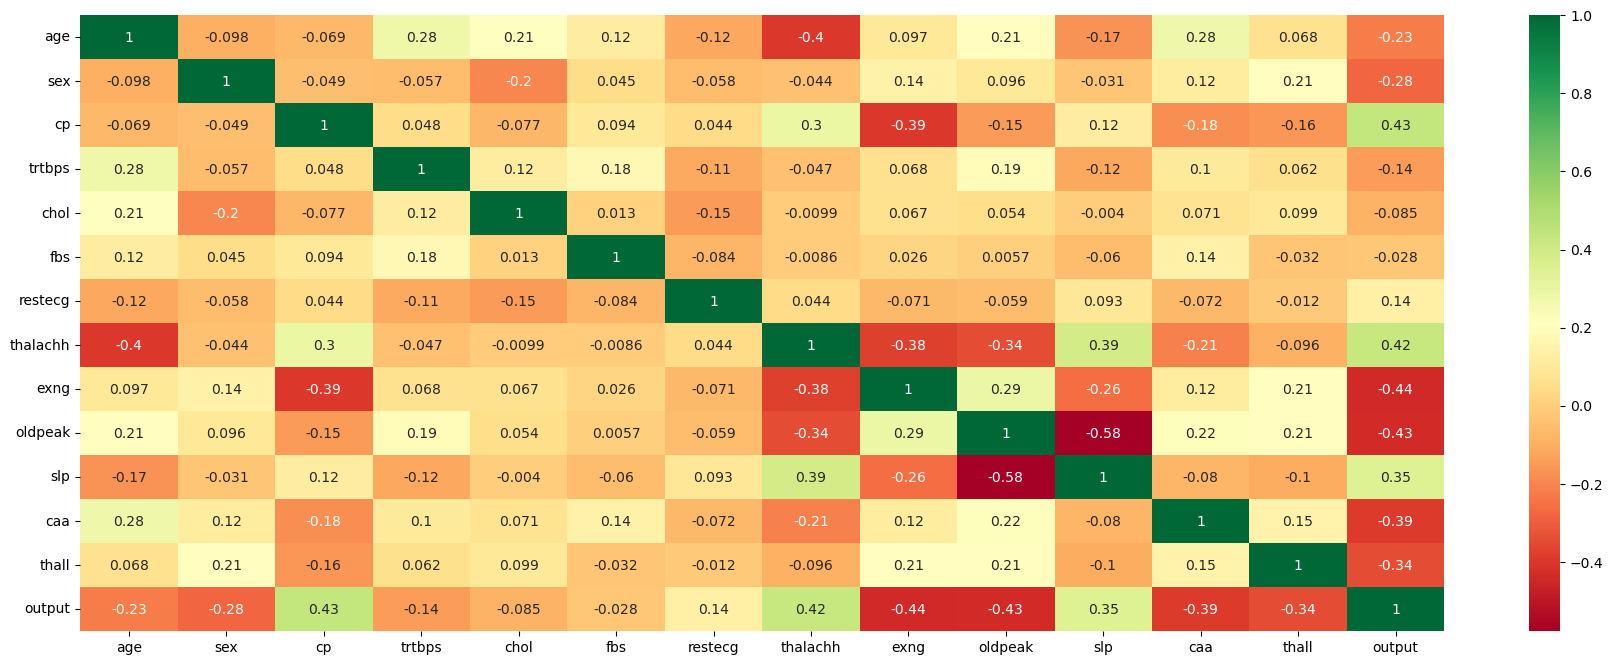

In [12]:
# Plotting heat map of correlation
plt.figure(figsize=(22, 8))
sns.heatmap(dummy_data.corr(), annot=True, cmap="RdYlGn")

We can see that there isn't a lot of correlation between the variables. 

The scale on the right side of the plot indicates the correlation between the variables, green being the highest and dark red being the lowest. Variable having a dark green colours have high correlation, e,g., Sp and thalachh have a correlation of 0.39 means with increasing sp, there is a 39 percent chance of having a increased thalachh.



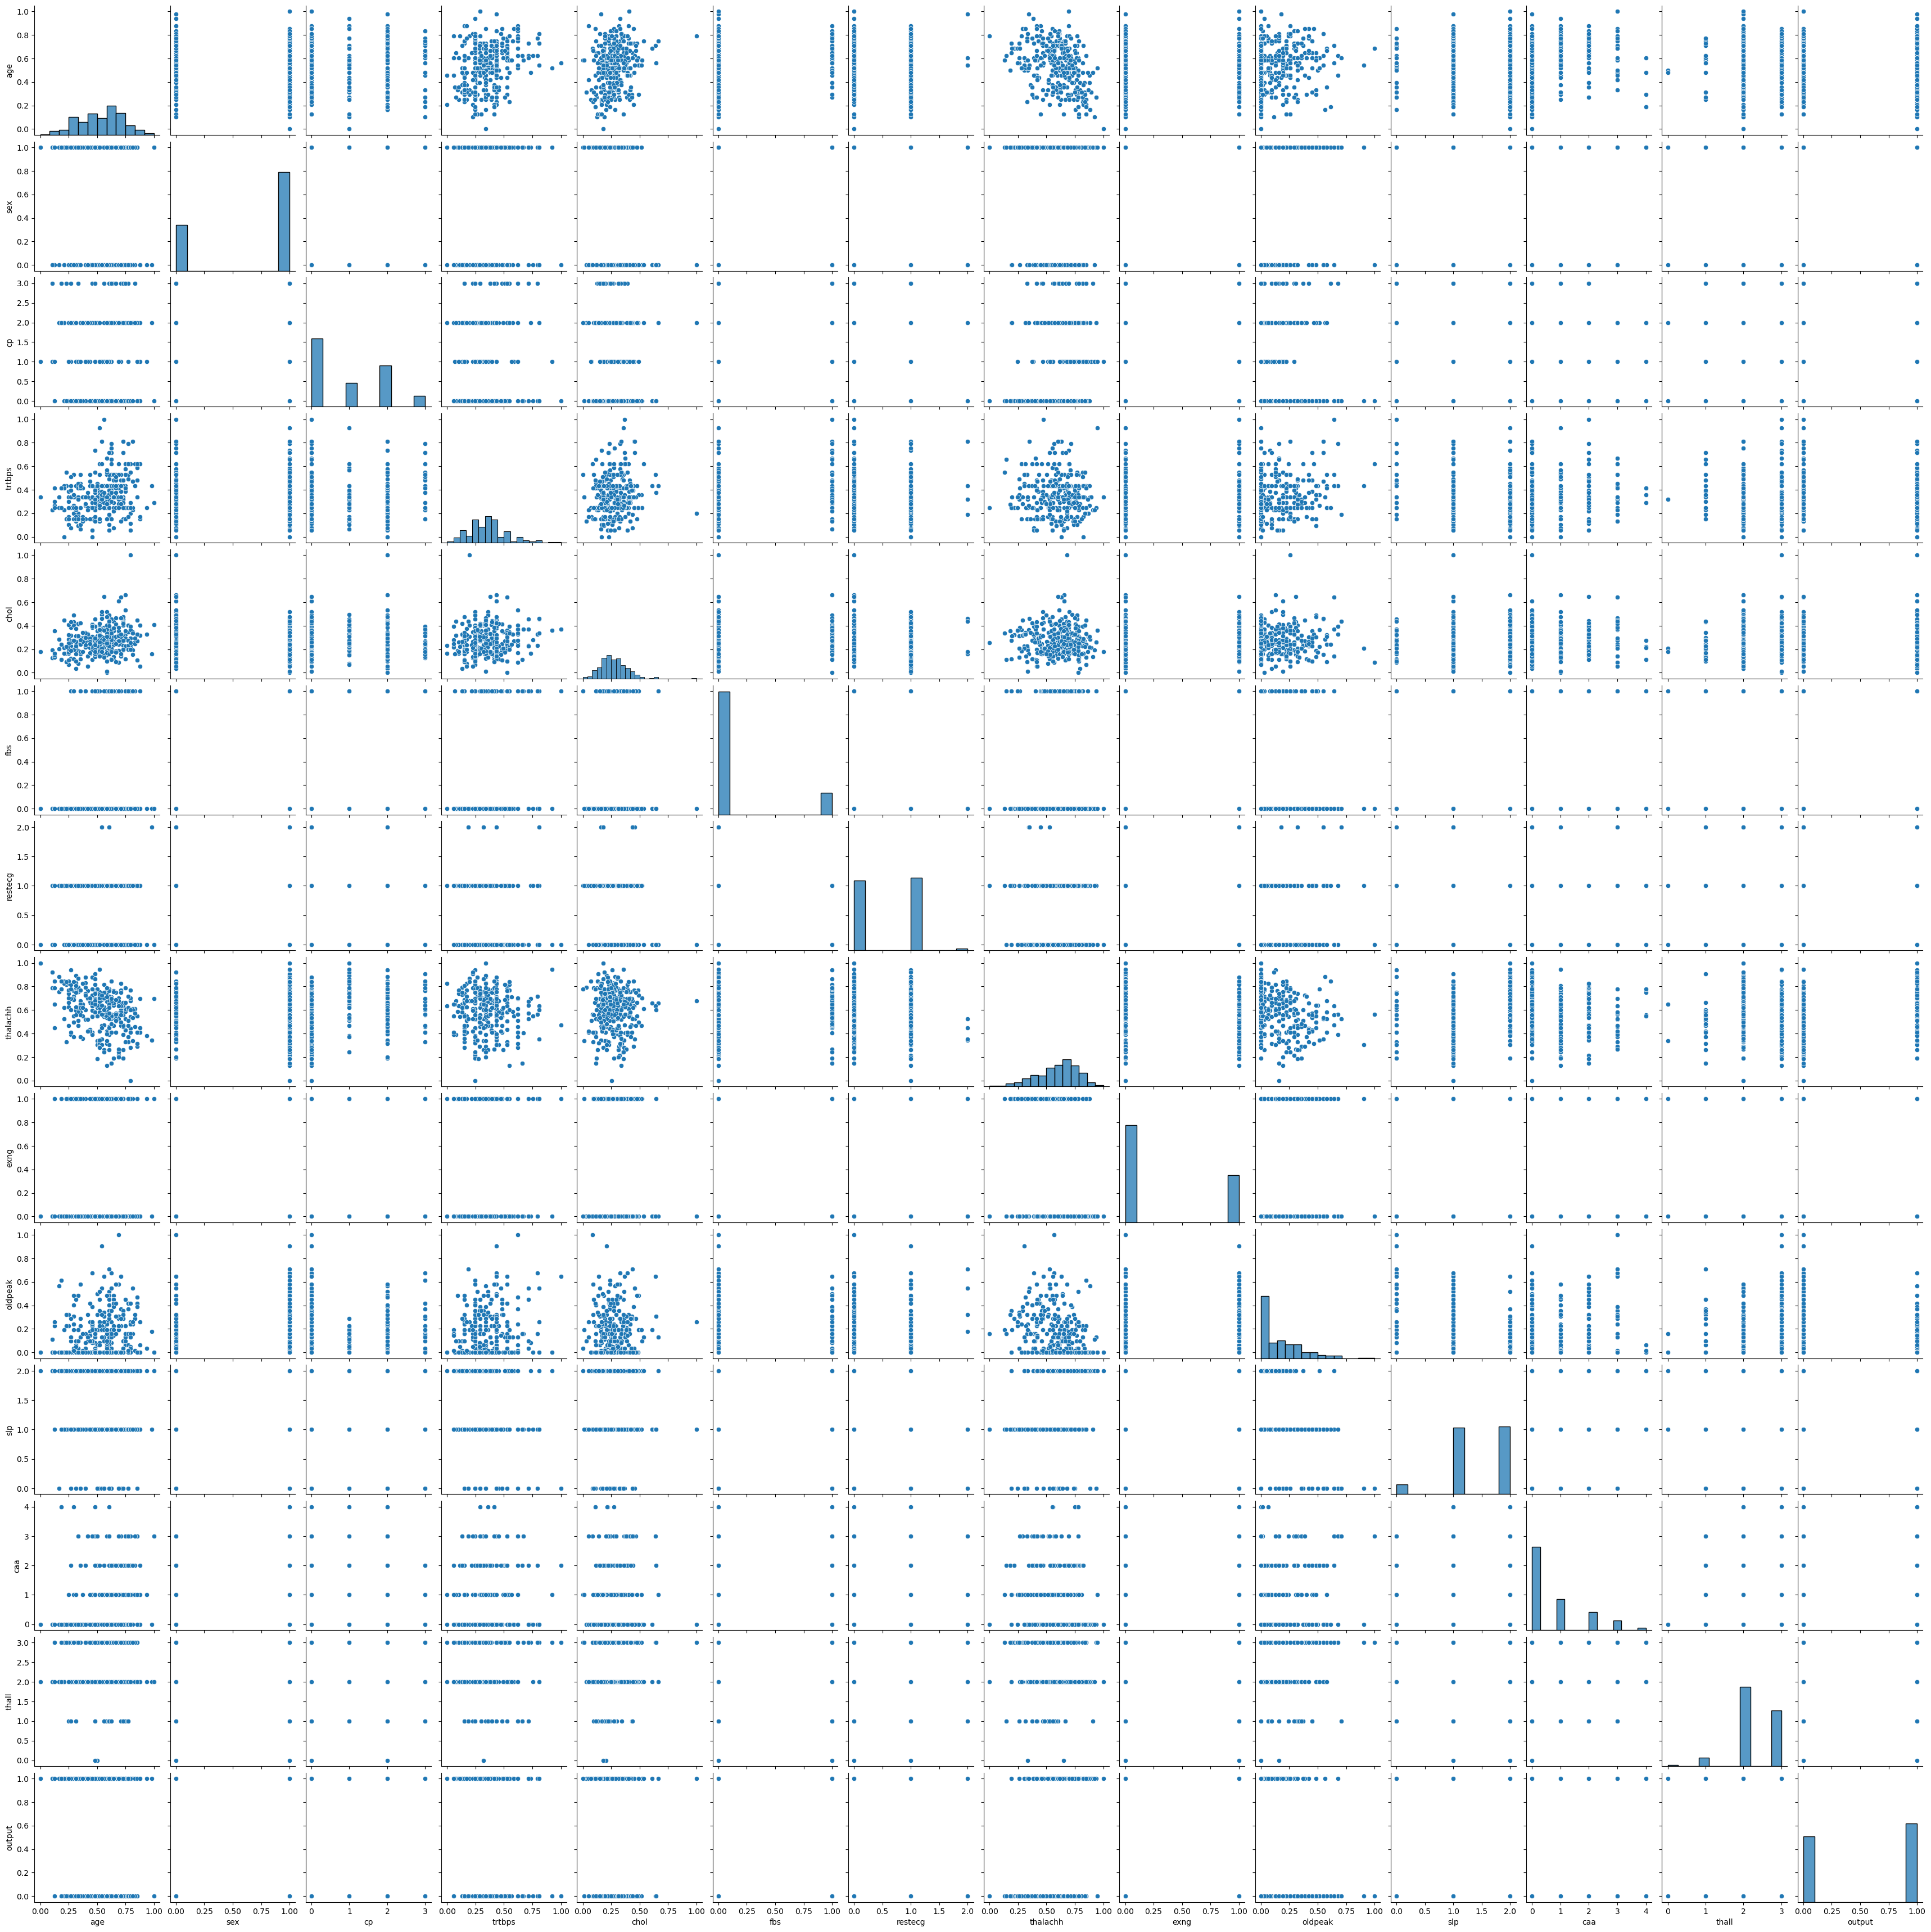

In [13]:
# Checking colinearity using pair plot
sns.pairplot(dummy_data)


In [14]:
# Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(
    dummy_data["output"],
    dummy_data[
        ["age","sex", "cp","trtbps","chol","fbs", "restecg", "thalachh", "exng", "oldpeak", "slp","caa","thall"]
    ],
).fit()

# Print out the statistics
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 output   R-squared (uncentered):                   0.763
Model:                            OLS   Adj. R-squared (uncentered):              0.752
Method:                 Least Squares   F-statistic:                              71.72
Date:                Mon, 02 Oct 2023   Prob (F-statistic):                    1.74e-82
Time:                        22:54:17   Log-Likelihood:                         -119.89
No. Observations:                 303   AIC:                                      265.8
Df Residuals:                     290   BIC:                                      314.1
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.2619      0.117      2.231      0.026       0.031       0.493
sex           -0.1535      0.048     -3.197      0.002      -0.248      -0.059
cp             0.1226      0.023      5.302      0.000       0.077       0.168
trtbps        -0.1520      0.138     -1.104      0.270      -0.423       0.119
chol          -0.0117      0.189     -0.062      0.951      -0.384       0.360
fbs            0.0170      0.062      0.274      0.784      -0.105       0.139
restecg        0.0884      0.041      2.179      0.030       0.009       0.168
thalachh       0.7937      0.127      6.240      0.000       0.543       1.044
exng          -0.0930      0.052     -1.784      0.076      -0.196       0.010
oldpeak       -0.2204      0.144     -1.530      0.127      -0.504       0.063
slp            0.1347      0.042      3.185      0.002       0.051       0.218
caa           -0.1057      0.023     -4.669      0.000      -0.150      -0.061
thall         -0.0571      0.034     -1.657      0.099      -0.125       0.011
==============================================================================
Omnibus:                        8.060   Durbin-Watson:                   1.059
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                8.365
Skew:                          -0.402   Prob(JB):                       0.0153
Kurtosis:                       2.873   Cond. No.                         31.0
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

trtbps, fbs, oldpeak, chol - These variables have a high P value and it means these are less significant
caa, slp, thalachh, cp - These are significant variables since they have a low p value. 



## Building the Model

### Train ,Validation and Test split



In [17]:
from sklearn.model_selection import train_test_split

"""
x - Independant variables. 
y- Dependant variable

Data Split -  Training 72.25%, Validation - 12.75%, Test - 15%

We are first splitting out 15 percent to test our model. 
15 percent out of the remaining 85 percent, is used for validating the model and the
remaining data is used for training the model and thus the split comes out as - 
Training 72.25%, Validation - 12.75%, Test - 15%
"""

x = dummy_data[
["age","sex", "cp","trtbps","chol","fbs", "restecg", "thalachh", "exng", "oldpeak", "slp","caa","thall"]]

y = dummy_data["output"]



x_train_total, x_test, y_train_total, y_test = train_test_split(x, y, test_size=0.15, random_state=1)

x_train, x_validate, y_train, y_validate = train_test_split(
    x_train_total, y_train_total, test_size=0.15, random_state=1
)

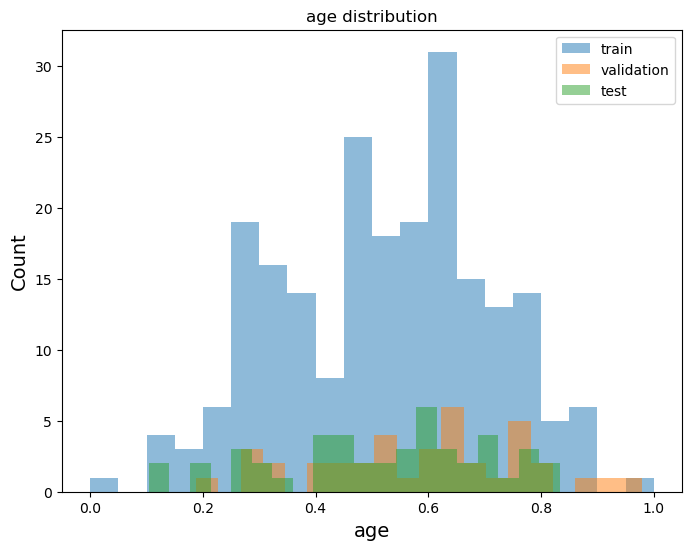

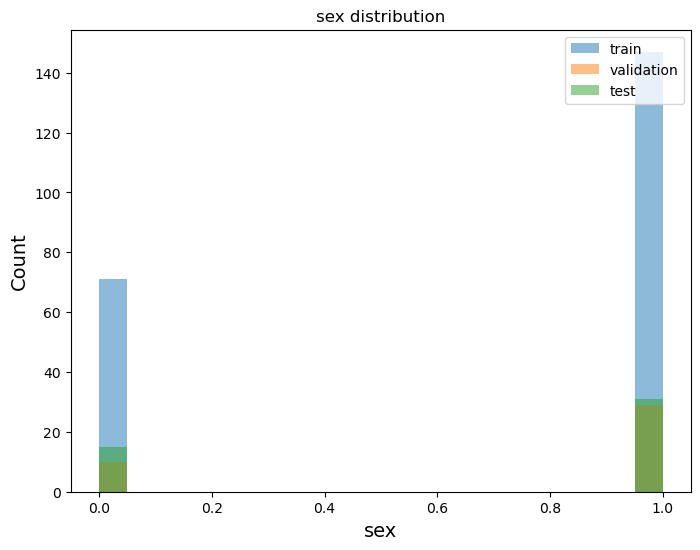

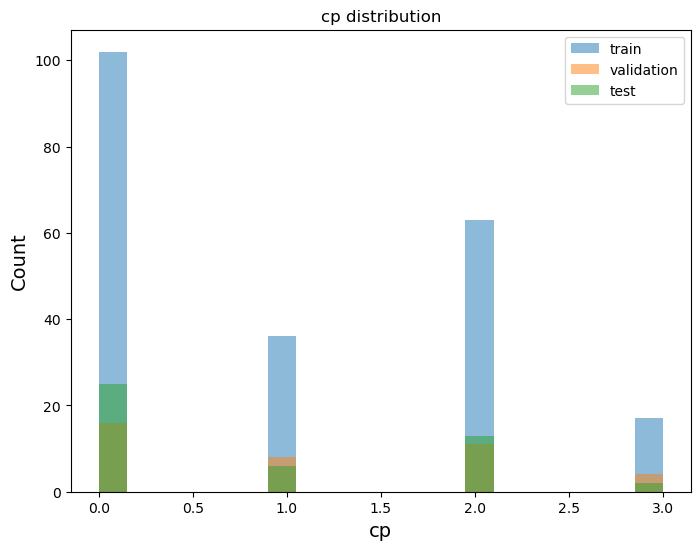

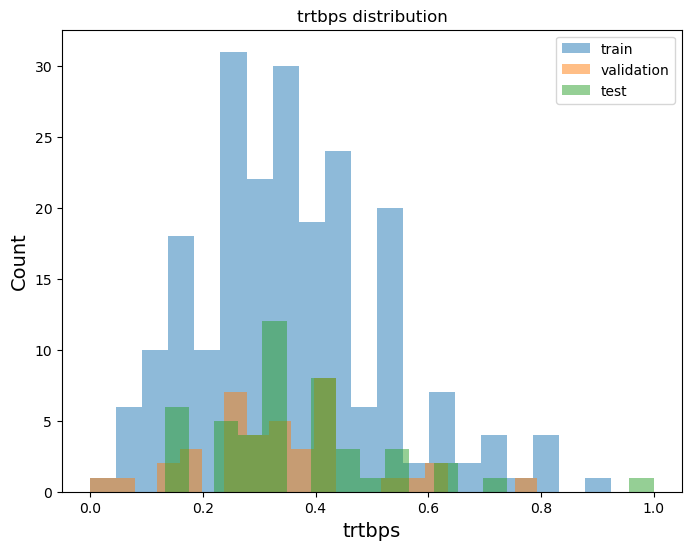

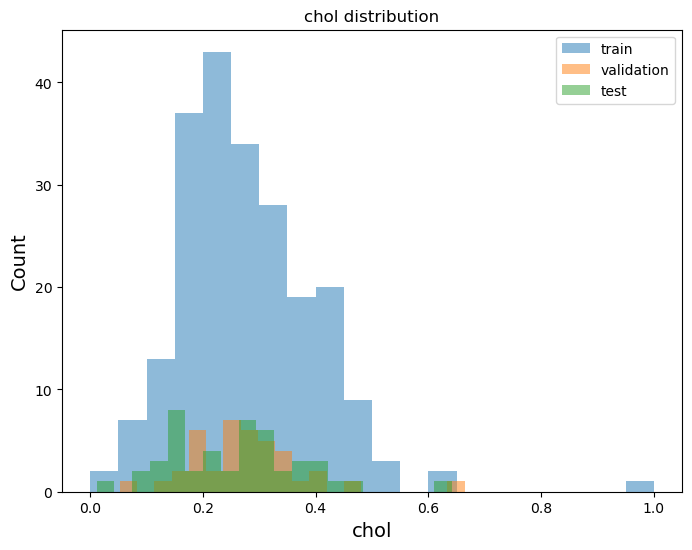

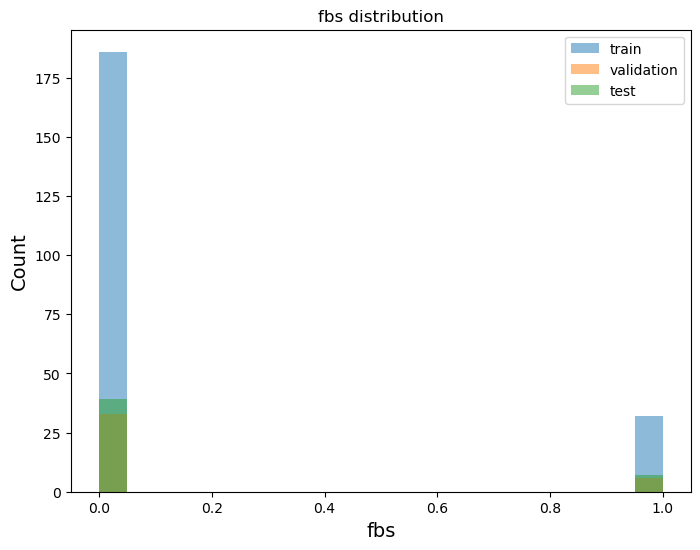

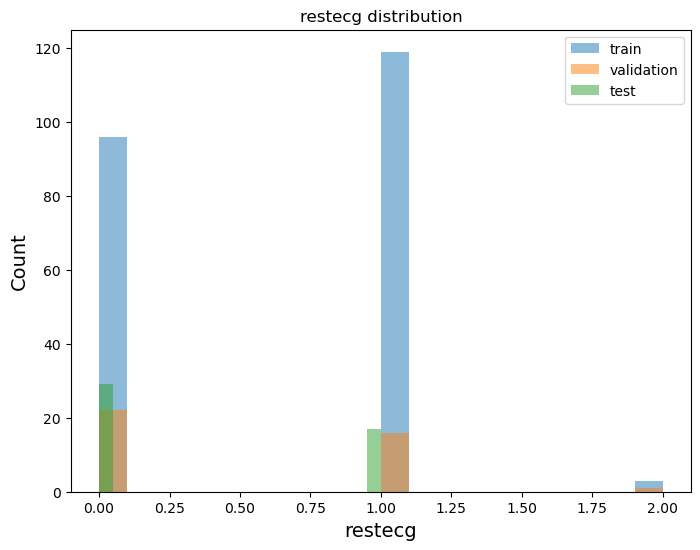

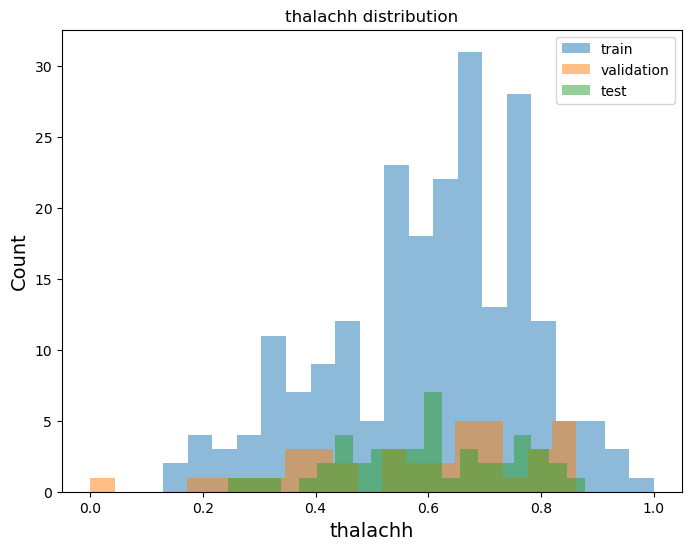

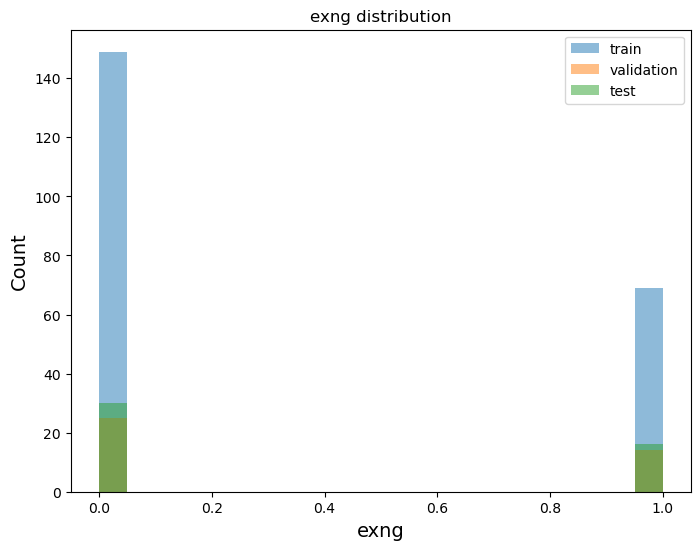

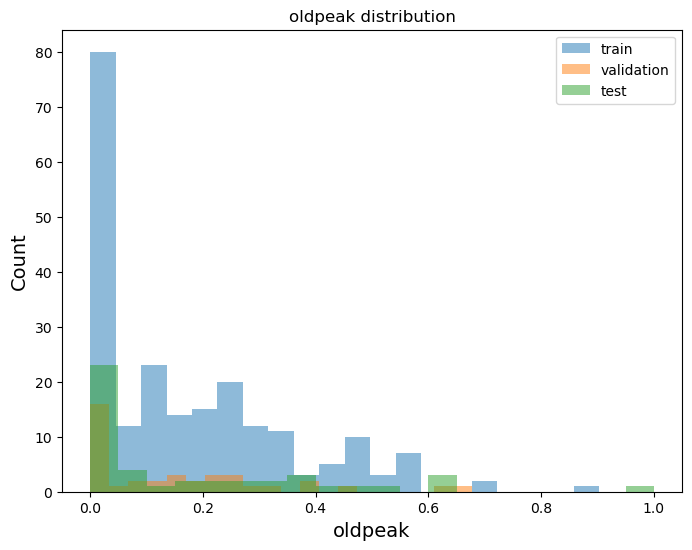

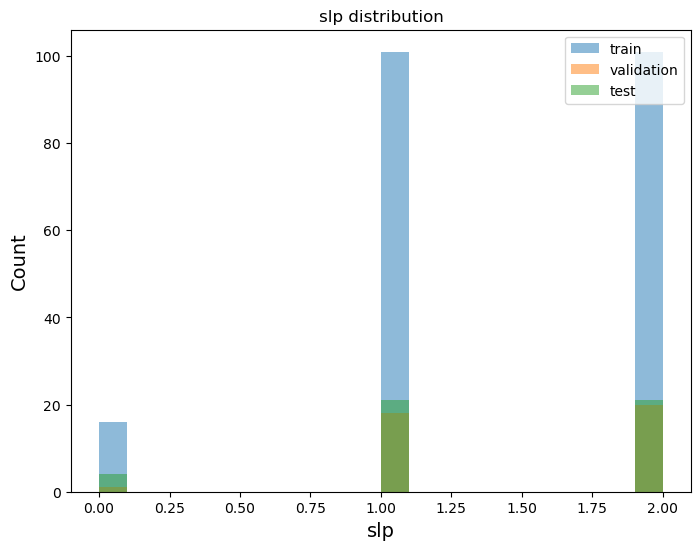

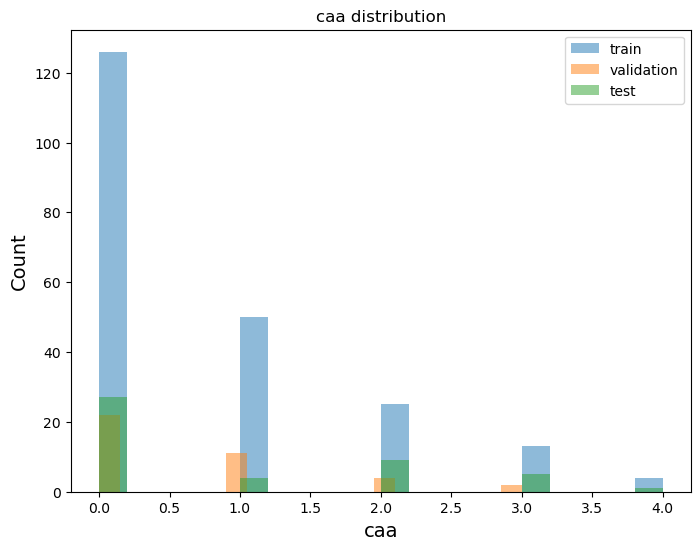

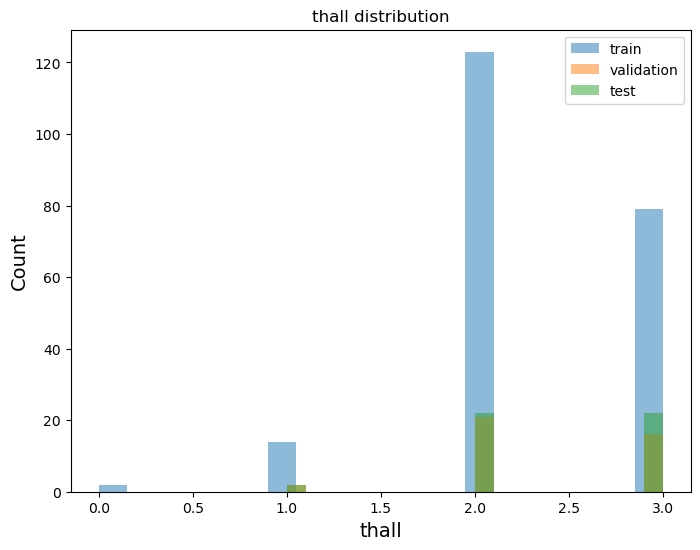

In [18]:
"""
Plotting the data to see distribution histograms. 
These are used to validate that the test, train and
validate data is distributed as expected.
"""

# Test Data Plot

x_train_plot = x_train[
["age","sex", "cp","trtbps","chol","fbs", "restecg", "thalachh", "exng", "oldpeak", "slp","caa","thall"]
]


#Validation Data Plot
x_validation_plot = x_validate[
["age","sex", "cp","trtbps","chol","fbs", "restecg", "thalachh", "exng", "oldpeak", "slp","caa","thall"]
]


# Test Data Plot
x_test_plot = x_test[
["age","sex", "cp","trtbps","chol","fbs", "restecg", "thalachh", "exng", "oldpeak", "slp","caa","thall"]
]

# Plotting the data to see the histogram
for c in x_test_plot.columns[:]:
    plt.figure(figsize=(8, 6))
    plt.hist(x_train_plot[c], bins=20, alpha=0.5, label="train")
    plt.hist(x_validation_plot[c], bins=20, alpha=0.5, label="validation")
    plt.hist(x_test_plot[c], bins=20, alpha=0.5, label="test")
    plt.xlabel(c, size=14)
    plt.ylabel("Count", size=14)
    plt.legend(loc="upper right")
    plt.title("{} distribution".format(c))
    plt.show()

The distribution of data looks correct in the graphs above. 


 ## K-Neighbors Classifier

In [104]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import datasets, linear_model
from sklearn.neighbors import KNeighborsClassifier

# Creating a linear regression model object
dt = KNeighborsClassifier()

# Training the model using training data

dt.fit(x_train, y_train)

KNeighborsClassifier()

## Making Predictions

In [105]:
# Make predictions using the Training Dataset
y_prediction = dt.predict(x_train)

# Calculate the accuracy using the training predictions
print("Accuracy: %.2f" % accuracy_score(y_train, y_prediction))

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_prediction))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_train, y_prediction))
r2 = r2_score(y_train, y_prediction)
print("R^2 score on tarining set =", r2)

Accuracy: 0.90
Mean squared error: 0.10
Coefficient of determination: 0.61
R^2 score on tarining set = 0.6099514356309108


In [106]:
# Make predictions using the Validation Dataset
y_prediction = dt.predict(x_validate)

# Calculate the accuracy using the training predictions
print("Accuracy: %.2f" % accuracy_score(y_validate, y_prediction))

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_validate, y_prediction))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_validate, y_prediction))
r2_val = r2_score(y_validate, y_prediction)
print("R^2 score on validation set =", r2_val)

Accuracy: 0.79
Mean squared error: 0.21
Coefficient of determination: 0.17
R^2 score on validation set = 0.17460317460317465


In [107]:
# Making predictions using the Test Dataset
y_prediction = dt.predict(x_test)
# Calculate the accuracy using the training predictions
print("Accuracy: %.2f" % accuracy_score(y_test, y_prediction))


# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_prediction))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_prediction))
r2 = r2_score(y_test, y_prediction)
print("R^2 score on test set =", r2)

Accuracy: 0.78
Mean squared error: 0.22
Coefficient of determination: 0.13
R^2 score on test set = 0.13043478260869568


In [108]:
cf_matrix = confusion_matrix(y_test, y_prediction) 

In [109]:
cf_matrix

array([[17,  6],
       [ 4, 19]])

<Axes: >

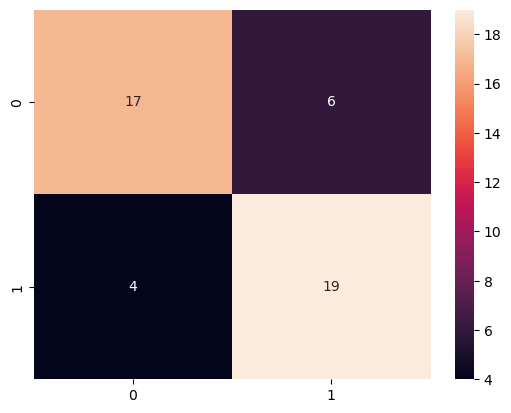

In [110]:
sns.heatmap(cf_matrix, annot=True)

In [111]:
"""
Remove 1%, 5%, and 10% of your data randomly and impute the values back 
using at least 3 imputation methods. How well did the methods recover the 
missing values?  That is remove some data, check the % error on residuals for numeric data and 
check for bias and variance of the error.
"""

impute_data = dummy_data[['output']]
impute_data['1_percent'] = impute_data[['output']]
impute_data['5_percent'] = impute_data[['output']]
impute_data['10_percent'] = impute_data[['output']]
# df_imputation['sample_num'] = df_imputation[['Unnamed: 0']]
# df_imputation['sample_num'] = df_imputation['sample_num']/1000
impute_data.head()


/var/folders/5_/3h66n0vj5r97wb1lxpq1pv3h0000gn/T/ipykernel_95522/3021042652.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  impute_data['1_percent'] = impute_data[['output']]
/var/folders/5_/3h66n0vj5r97wb1lxpq1pv3h0000gn/T/ipykernel_95522/3021042652.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  impute_data['5_percent'] = impute_data[['output']]
/var/folders/5_/3h66n0vj5r97wb1lxpq1pv3h0000gn/T/ipykernel_95522/3021042652.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

,output,1_percent,5_percent,10_percent
0,1,1,1,1
1,1,1,1,1
2,1,1,1,1
3,1,1,1,1
4,1,1,1,1


In [112]:
def missing_percentage_getter(df):
    
    percent_missing = impute_data.isnull().sum() * 100 / len(impute_data)
    missing_value_df = pd.DataFrame({'column': impute_data.columns,
                                     'missing_percentage': percent_missing})
    return missing_value_df

In [113]:
print(missing_percentage_getter(impute_data))

                column  missing_percentage
output          output                 0.0
1_percent    1_percent                 0.0
5_percent    5_percent                 0.0
10_percent  10_percent                 0.0


In [114]:
def missing_creation(df, perc, column):
    df.loc[df.sample(frac = perc).index, column] = np.nan

In [115]:
missing_creation(impute_data, 0.01, '1_percent')
missing_creation(impute_data, 0.05, '5_percent')
missing_creation(impute_data, 0.1, '10_percent')

In [116]:
print(missing_percentage_getter(impute_data))

                column  missing_percentage
output          output            0.000000
1_percent    1_percent            0.990099
5_percent    5_percent            4.950495
10_percent  10_percent            9.900990


In [117]:
# Storing Indexes of Null values in each columns

index_1 = list(np.where(impute_data['1_percent'].isna())[0])
index_5 = list(np.where(impute_data['5_percent'].isna())[0])
index_10 = list(np.where(impute_data['10_percent'].isna())[0])

In [118]:
print(f"Index_1 length is {len(index_1)} and it contains {(len(number_1_idx)/len(df_imputation['1_percent']))*100}% of total data in column | Total rows: {len(df_imputation['1_percent'])}")
print(f"Index_5 length is {len(index_5)} and it contains {(len(number_5_idx)/len(df_imputation['1_percent']))*100}% of total data in column | Total rows: {len(df_imputation['1_percent'])}")
print(f"Index_10 length is {len(index_10)} and it contains {(len(number_10_idx)/len(df_imputation['1_percent']))*100}% of total data in column | Total rows: {len(df_imputation['1_percent'])}")

Index_1 length is 3 and it contains 0.9900990099009901% of total data in column | Total rows: 303
Index_5 length is 15 and it contains 4.9504950495049505% of total data in column | Total rows: 303
Index_10 length is 30 and it contains 9.900990099009901% of total data in column | Total rows: 303


KNN

In [119]:
#Creating a seperate dataframe for performing the KNN imputation
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
impute_data_1 = df_imputation[['1_percent','5_percent','10_percent']]
imputer = KNNImputer(n_neighbors=5)
imputed_df = pd.DataFrame(imputer.fit_transform(impute_data_1), columns = impute_data_1.columns)

In [120]:
# imputed_number_df.sample(10)
imputed_df.head()

,1_percent,5_percent,10_percent
0,1.0,1.0,1.0
1,1.0,1.0,1.0
2,1.0,1.0,1.0
3,1.0,1.0,1.0
4,1.0,1.0,1.0


In [121]:
print(missing_percentage_getter(imputed_df))

                column  missing_percentage
output          output            0.000000
1_percent    1_percent            0.990099
5_percent    5_percent            4.950495
10_percent  10_percent            9.900990


In [122]:
output = df["output"]
imputed_mean = pd.concat([output,imputed_df])
imputed_mean.columns = ["output","1_Percent","5_Percent","10_Percent"]
imputed_mean.var()

output        0.248836
1_Percent     0.248836
5_Percent     0.248836
10_Percent    0.248836
dtype: float64

In [123]:
!pip install opendatasets

References - 


* Scikit-learn cheat sheet: methods for classification & regressionhttps://www.educative.io/blog/scikit-learn-cheat-sheet-classification-regression-methods
* Classifier Comparison - https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html
* Heart Attack Analysis & Prediction Dataset https://www.educative.io/blog/scikit-learn-cheat-sheet-classification-regression-methods

Licences:

* Pandas 1.4 https://pandas.pydata.org/docs/getting_started/overview.html
* Scipy.stats https://docs.scipy.org/doc/scipy/reference/stats.html
* sklearn.DecisionTreeClassifier https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
